# Demonstrate FFT filtering


It is also possible to perform manipulations of waveforms in the frequency domain. This has physical applications in low-pass, high-pass, and band-pass filters. Only certain frequencies are allowed in the frequency domain. Once transforming back into the time domain, there are observable effects on the waveform. You can remove high frequencies, low frequencies, or bands of frequencies. 

To demonstrate this, we will look at a different dataset, the number of sunspots in the sun from [the Solar Influences Data Analysis Center](http://www.sidc.be/DATA/yearssn.dat). Sunspots are often accompanied by solar flares, which can affect temperatures on earth. 

However, this dataset is often used by climate change deniers to therefore conclude that humans are not responsible for the warming planet. This dataset does not support the hypothesis quantitatively because the sun spot activity does not correlate with the global temperature anomaly. 

In [3]:
import matplotlib.pyplot as plt

from fft import fft, fft_power, ifft
import numpy as np
import math

In [4]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 150

## Sunspot Data

These data need to be padded. Once we transform to the Fourier domain, we will see several dominant frequencies. We will investigate what happens when we remove the higher-frequency components. 

If you would like to adjust the amount of smoothing, you can adjust the "maxfreq" variable. 

 Sunspot data from Solar Influences Data Analysis Center


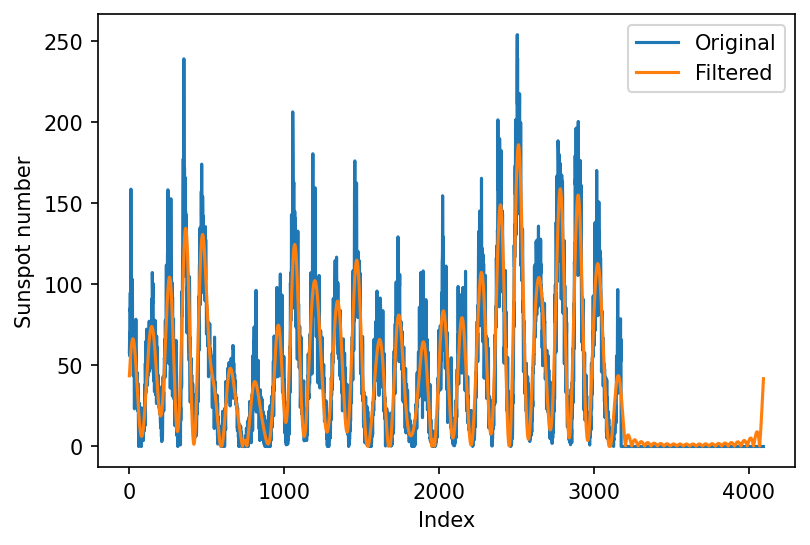

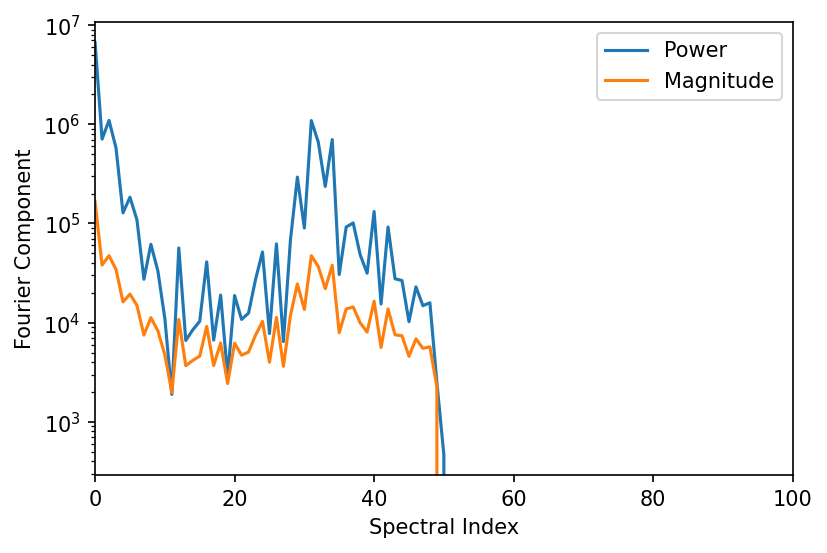

In [5]:
from read_ssn import read_ssn
import math

# Read like previous example with CO2 data
x,y = read_ssn('monthssn.dat')
y_valid = y >= 0.
y = y[y_valid]

# instead of truncating, pad with values

N = len(y)
log2N = math.log(N, 2)
next_pow_of_2 = int(log2N) + 1
if log2N - int(log2N) > 0.0 :    
    ypads = np.full( 2**( next_pow_of_2) - N, 0, dtype=np.double)
    y = np.concatenate( (y, ypads) )
    # CAREFUL: When you pad, the x axis becomes somewhat "meaningless" for the padded values, 
    # so typically it is best to just consider it an index
    x = np.arange(len(y))
    N = len(y)
                
# Get the FFT
Y = fft(y)
# Smooth the data in the Fourier domain.
# Adjust this to change the frequencies to delete (frequencies are removed from maxfreq to N/2
# and accounts for the Nyquist frequency). 
maxfreq = 50
Y[maxfreq:len(Y)-maxfreq] = 0.0
# Get the absolute value and power for plotting
Y_abs = abs(Y)
powery = fft_power(Y)
powerx = np.arange(powery.size)

# Now go back to the frequency domain. 
# Compare the data before and after filtering. 
yfiltered = ifft(Y)
yfiltered_abs= abs(yfiltered)



f1 = plt.figure(1)
plt.plot( x, y, label='Original' )
plt.plot( x, yfiltered_abs, label='Filtered' )
plt.xlabel("Index")
plt.ylabel("Sunspot number")
plt.legend()

f2 = plt.figure(2)
plt.plot( powerx, powery, label="Power" )
plt.plot( x, Y_abs, label="Magnitude" )
plt.legend()
plt.xlim([0,maxfreq*2])
plt.yscale('log')
plt.xlabel("Spectral Index")
plt.ylabel("Fourier Component")

plt.show()

